#  Yeni başlayanlar için meme kanseri data incelemesi

Meme dokusunun içerisinde yer alan süt kanallarının içerisinde veya süt bezlerinde kanser hücrelerinin oluşumu ve çoğalması, meme kanseri olarak adlandırılır. 

Belirtileri Nelerdir ?
*  Göğüs veya koltuk altı bölgesinde ele gelen şişlik
*  Meme başından akıntı gelmesi
*  Meme başında şekil bozukluğu, çökme ve renk değişimi
*  Meme başında egzama benzeri deri döküntüleri ve soyulmalar
*  Meme ucunda kızarıklık ve yara oluşumu
*  Kilo kaybı
*  Meme ağrısı
*  Halsizlik ve çabuk yorulma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("breast_cancer_dataset.csv")

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 Hızlıca bi teşhis sayımıza bakmak istersek eğer ;
 
 malignant - benign ( M - B)
 (kötü huylu - iyi huylu)
 

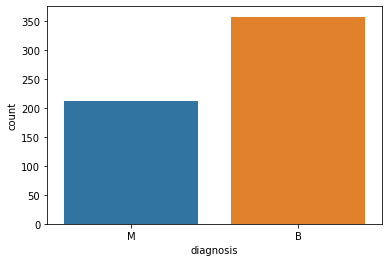

In [9]:
sns.countplot(x="diagnosis",data = data)

Data setimizedeki başlıklara genel bir bakış attığımızda bir çok başlık olduğunu görebiliyoruz şimdilik kendi kullanım amacımız için;

* Unnamed : 32
* id
* diagnosis 
başlıklarımızı drop edebiliriz bu incelemede bu özelliklerin kullanılmasına gerek yok.

" İhtiyaç duyulursa makine öğrenme algoritmaları için diagnosis seçeneğinin one hot encoding işlemi ile de sayısal değerlere çevrilip kullanıma katılabileceğini söyleyelim "

In [10]:
list = ["Unnamed: 32","id","diagnosis"]
bc_data = data.drop(list,axis = 1)
bc_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlation 
Korelasyon değerler arasında olumlu yada olumsuz ilişkilerini kendi aralardında görmek için kullanıyoruz. 
1 ve -1 arasında gördüğümüz korelasyon değerleri 1 e yaklaştığında aralında pozitif ilişki  -1 e yaklaştığında ise negatif ilişki belirtir.


![clip_image0011](https://fisherdong.files.wordpress.com/2011/03/clip_image0011.jpg)

In [11]:
bc_data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Filtreleme yaparak istediğimiz özelliklerin istediğimiz değerler arasındaki tüm verilerine ulaşabiliriz.

In [13]:
bc_data[np.logical_and(bc_data["area_mean"] > 250,bc_data["area_worst"] < 350)]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.015040,0.1717,0.06899,...,10.410,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.000000,0.1903,0.06422,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.00000,0.00000,0.3105,0.08151
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.017560,0.019520,0.1934,0.06285,...,10.420,23.22,67.08,331.6,0.14150,0.12470,0.06213,0.05588,0.2989,0.07380
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,0.1551,0.06403,...,10.510,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.10860,0.18870,0.18680,0.02564,0.2376,0.09206
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,0.1621,0.05952,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211


## Data Visulatization

İlk olarak seaborn kütüphanesini kullanarak üst kısımda veri setimizin korelasyon ilişkisini bir "heatmap" ile görselleştirme yaparak daha net şekilde anlayabiliriz.

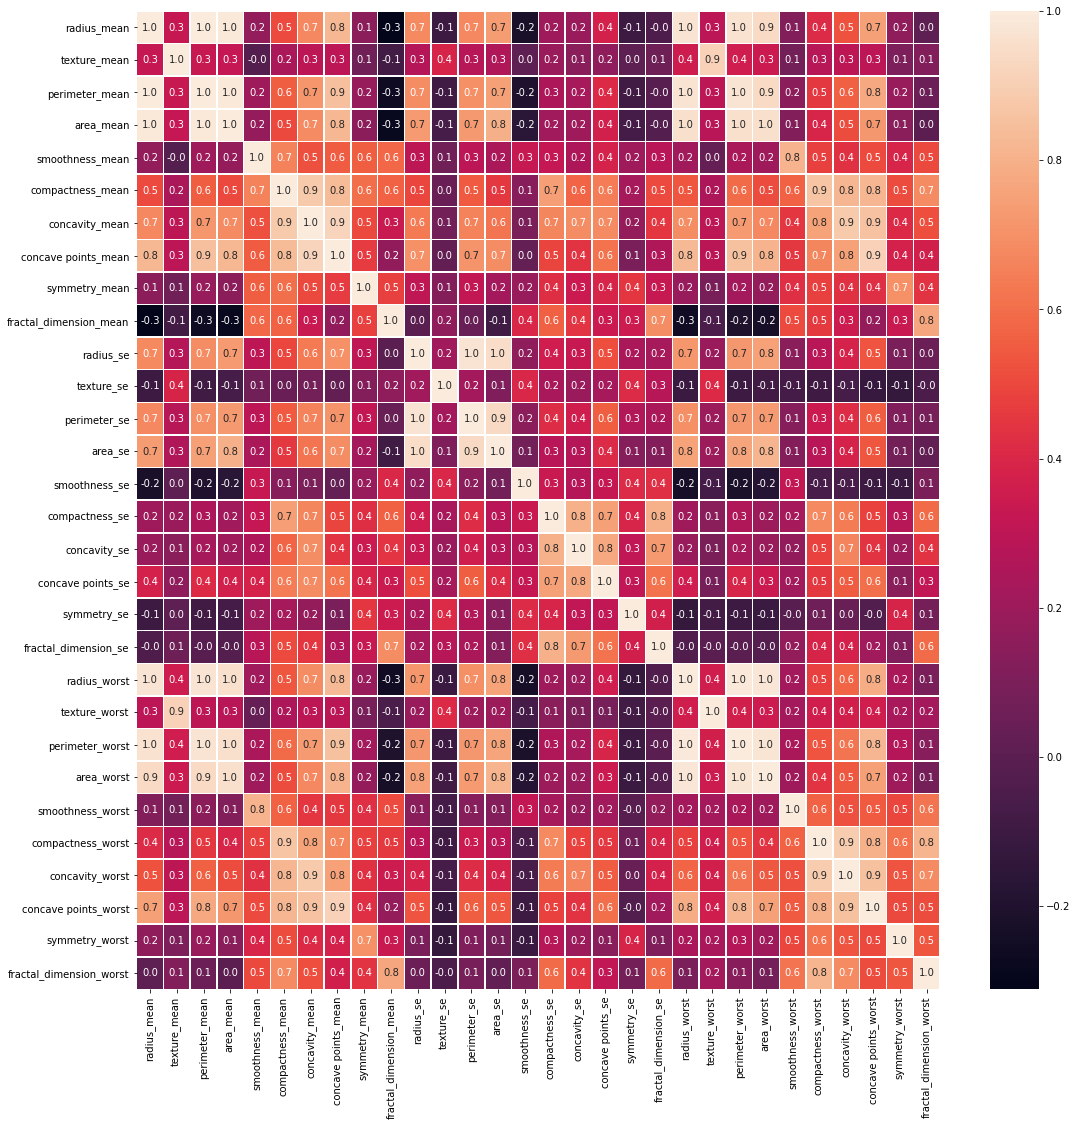

In [16]:
f,ax = plt.subplots(figsize = (18,18))
sns.heatmap(bc_data.corr(),annot = True, linewidths= .5,fmt = ".1f",ax = ax)
plt.show()

* Colleration Heatmap

### Bar Plot

İlk başta teşhis değerlerine baktığımız "countplot" dışında, bar plot sayesinde daha detaylı ve açıklama olarak başlıklara sahip bir görselleştirme sunabiliriz.

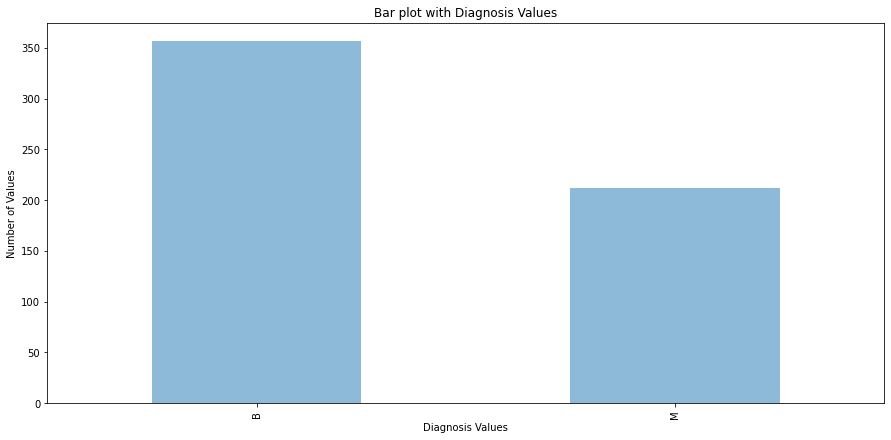

In [17]:
data_frame = pd.DataFrame(data) # ilk datamız drop öncesi
data_frame["diagnosis"].value_counts().plot(kind = "bar",alpha = 0.5,figsize=(15,7))
plt.title("Bar plot with Diagnosis Values")
plt.xlabel("Diagnosis Values")
plt.ylabel("Number of Values")
plt.show()

### Scatter Plot

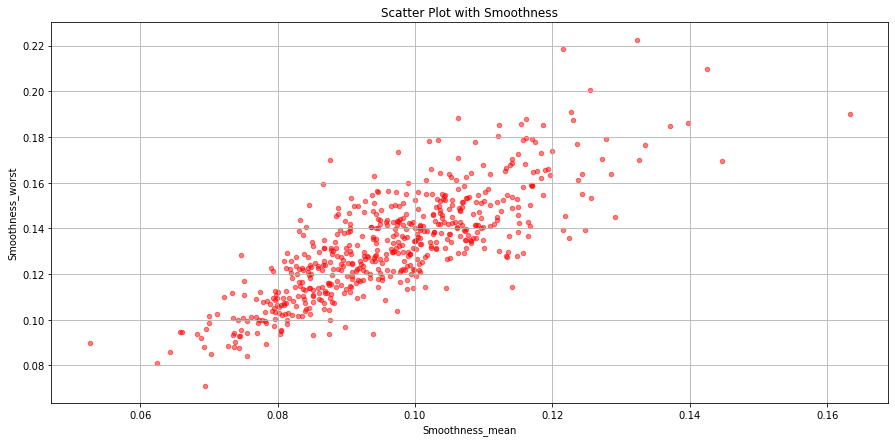

In [25]:
bc_data.plot(kind = "scatter", x = "smoothness_mean", y = "smoothness_worst",grid = True,alpha =0.5, color = "red",figsize = (15,7))
plt.title("Scatter Plot with Smoothness")
plt.xlabel("Smoothness_mean")
plt.ylabel("Smoothness_worst")
plt.show()

### Line Plot

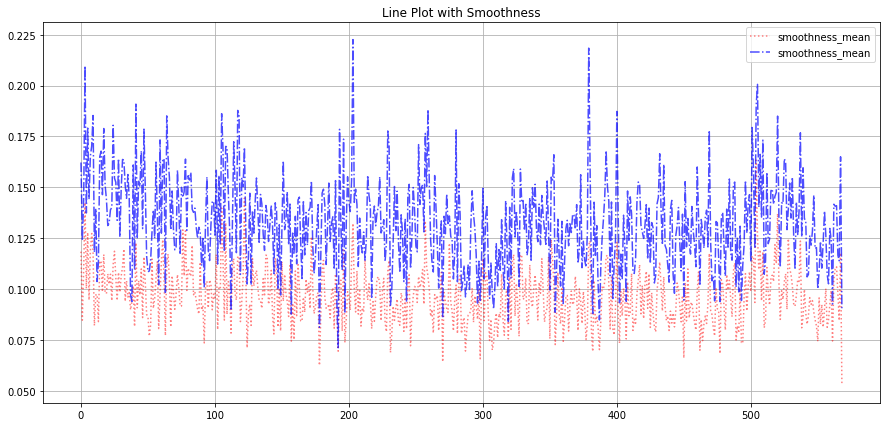

In [21]:
bc_data.smoothness_mean.plot(kind = "line" , color = "red", alpha = 0.5,label = "smoothness_mean", grid = True, linestyle = ":",figsize = (15,7))
bc_data.smoothness_worst.plot(kind = "line" , color = "blue", alpha = 0.7,label = "smoothness_mean", grid = True, linestyle = "-.",figsize = (15,7))
plt.title("Line Plot with Smoothness")
plt.legend()
plt.show()

### Histogram

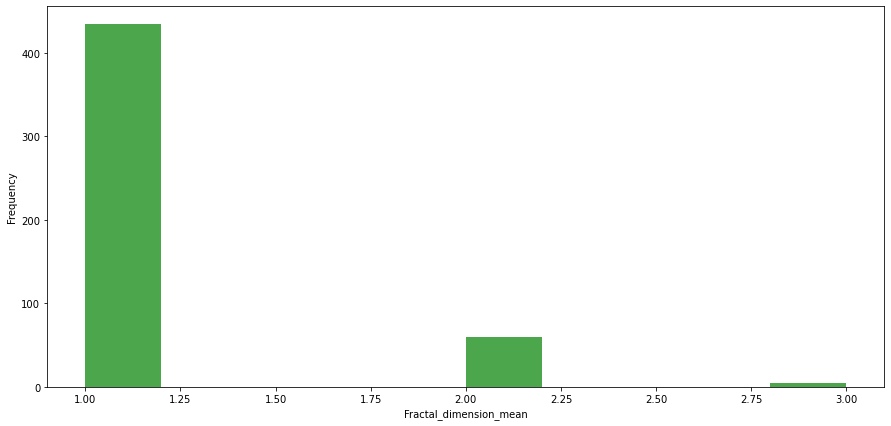

In [24]:
bc_data["fractal_dimension_mean"].value_counts().plot(kind = "hist",color = "g",alpha = 0.7,figsize = (15,7))
plt.xlabel("Fractal_dimension_mean")
plt.show()